In [1]:
import cv2
import numpy as np
%matplotlib inline
from collections import deque
a = deque(maxlen=2)

In [160]:
xb = cv2.VideoCapture("/home/qinjianbo/Videos/xb.mp4")

In [161]:

def getContours(img):
    closed = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
    closed = cv2.morphologyEx(closed, cv2.MORPH_CLOSE, kernel)
    closed = cv2.dilate(closed,kernel,iterations=2)
    contours  = cv2.findContours(closed, cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)[-2]
    validContours = [];
    for cont in contours:
        #if cv2.contourArea(cont) > 2000:
        if len(a) == 0:
            a.appendleft(cont)
            # x,y,w,h = cv2.boundingRect(cont)
            # if h/w > 0.75:
            #validContours.append(cv2.convexHull(cont))
            # rect = cv2.minAreaRect(cont)
            # box = cv2.cv.BoxPoints(rect)
            # validContours.append(np.int0(box))
        elif len(a) == 1:
            if(cv2.contourArea(cont) > cv2.contourArea(a[0])):
                a.append(cont)
            else:
                a.popleft()
                a.appendleft(cont)
        elif len(a) == 2:
            if(cv2.contourArea(cont) > cv2.contourArea(a[1])):
                a.popleft()
                a.append(cont)
    validContours.append(cv2.convexHull(a[0]))
    validContours.append(cv2.convexHull(a[1]))
    return validContours

In [162]:
_,img = xb.read()
img = cv2.resize(img,(800,480))

In [175]:
_,img = xb.read(200)
img = cv2.resize(img,(800,480))
#lower_skin = np.array([0, 85, 120])
#upper_skin = np.array([200, 250, 255])
lower_skin = np.array([0, 100, 100])
upper_skin = np.array([200, 250, 255])
kernel = np.ones((5,5),np.uint8)
imgHSV = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
imgfilter = cv2.inRange(imgHSV,lower_skin,upper_skin)
imgfilter = cv2.dilate(imgfilter,kernel,iterations=1)
conts = getContours(imgfilter)
cv2.drawContours(img, conts, -1, (0, 255, 0), 2)
cv2.imshow("img",img)
cv2.waitKey(0)

-1

In [165]:
cv2.imshow("imgfilter",imgfilter)
cv2.waitKey(0)

-1

In [152]:
cv2.contourArea(conts[0]) - cv2.contourArea(conts[1])

-654.5

In [159]:
xb.release()

In [ ]:
import cv2
import sys

if __name__ == '__main__' :

    # Set up tracker.
    # Instead of MIL, you can also use
    # BOOSTING, KCF, TLD, MEDIANFLOW or GOTURN
    
    tracker = cv2.TrackerMIL_create()

    # Read video
    video = cv2.VideoCapture("/home/qinjianbo/Videos/xb.mp4")

    # Exit if video not opened.
    if not video.isOpened():
        print ("Could not open video")
        sys.exit()

    # Read first frame.
    ok, frame = video.read()
    if not ok:
        print ('Cannot read video file')
        sys.exit()
    
    # Define an initial bounding box
    bbox = (287, 23, 86, 320)

    # Uncomment the line below to select a different bounding box
    # bbox = cv2.selectROI(frame, False)

    # Initialize tracker with first frame and bounding box
    ok = tracker.init(frame, bbox)

    while True:
        # Read a new frame
        ok, frame = video.read()
        if not ok:
            break
        
        # Update tracker
        ok, bbox = tracker.update(frame)

        # Draw bounding box
        if ok:
            p1 = (int(bbox[0]), int(bbox[1]))
            p2 = (int(bbox[0] + bbox[2]), int(bbox[1] + bbox[3]))
            cv2.rectangle(frame, p1, p2, (0,0,255))

        # Display result
        cv2.imshow("Tracking", frame)

        # Exit if ESC pressed
        k = cv2.waitKey(1) & 0xff
        if k == 27 : breakq


In [2]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [103]:
img = plt.imread("/home/qinjianbo/Desktop/spec.png",0)

import torch.nn as nn

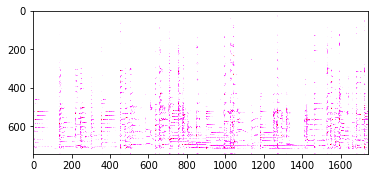

In [104]:
filter = np.array([
    [0,1,0],
    [0,10,0],
    [0,1,0]
])
img = plt.imread("/home/qinjianbo/Desktop/spec.png",0)
res = cv2.filter2D(img,-1,filter)
plt.imshow(res)

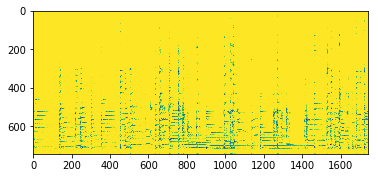

In [107]:
a = cv2.cvtColor(res,cv2.COLOR_BGR2GRAY)
plt.imshow(a)

In [93]:
from torch.autograd import Variable
import torch

In [94]:
input = Variable(torch.from_numpy(img))

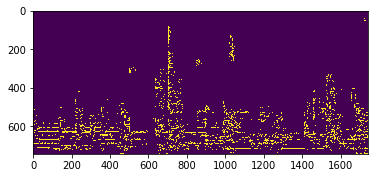

In [101]:
plt.imshow(img)

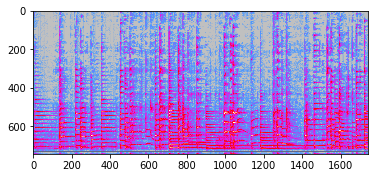

In [105]:
plt.imshow(img)